
# CLASSIFICATION OF KYPHOSIS DISEASE

# PROBLEM STATEMENT

- Kyphosis is an abnormally excessive convex curvature of the spine. The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery. Dataset contains 3 inputs and 1 output

INPUTS: 
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

OUTPUTS:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.


- Link to the dataset: https://www.kaggle.com/abbasit/kyphosis-dataset

- Source: John M. Chambers and Trevor J. Hastie eds. (1992) Statistical Models in S, Wadsworth and Brooks/Cole, Pacific Grove, CA.

## Import Libraries 


In [1]:
import pandas as pd                
import numpy as np                 
import matplotlib.pyplot as plt   
import seaborn as sns              

In [2]:
kyphosis_df = pd.read_csv('kyphosis.csv')

In [3]:
kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
kyphosis_df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [5]:
# View statistical details
kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [6]:
# Print summary of the dataframe. No empty data
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [59]:
kyphosis_df['Kyphosis'].unique

<bound method Series.unique of 0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64>

## Visualize Dataset

<AxesSubplot:xlabel='Kyphosis', ylabel='count'>

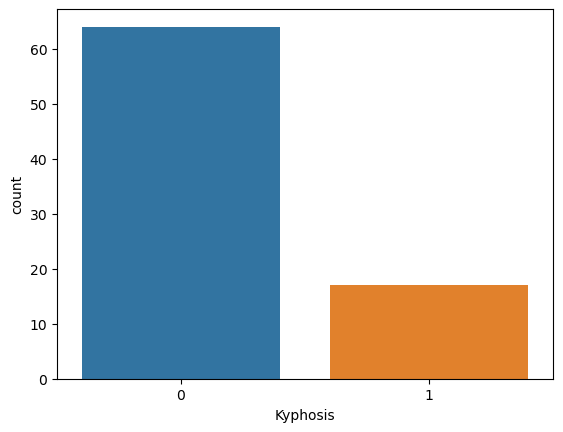

In [61]:
# Count Patients - 64 absent with no kyphosis after operation and 18 preset with the disease after surgery 
sns.countplot(x='Kyphosis', data = kyphosis_df)

In [62]:
# Perform data preprocessing. Import class
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Instantiate an object out of our class 
LabelEncoder_y = LabelEncoder()

# Replace Kyphosis column ("absent and present") into 0 and 1. Take the object and apply fit transform method to our column
kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(kyphosis_df['Kyphosis'])

In [63]:
kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [64]:
kyphosis_df.tail()

,Kyphosis,Age,Number,Start
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6
80,0,36,4,13


In [65]:
# Absent - no kyphosis after operation
kyphosis_False = kyphosis_df[kyphosis_df['Kyphosis']== 0]

In [66]:
kyphosis_False.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
3,0,2,5,1
4,0,1,4,15
5,0,1,2,16


In [67]:
print ('Disease absent after operation percentage = ', (len(kyphosis_False)/len(kyphosis_df)) * 100, '%') 

Disease absent after operation percentage =  79.01234567901234 %


In [68]:
# Disease kyphosis Present after the operation
kyphosis_True = kyphosis_df[kyphosis_df['Kyphosis']== 1]

In [69]:
kyphosis_True.head()

,Kyphosis,Age,Number,Start
2,1,128,4,5
9,1,59,6,12
10,1,82,5,14
21,1,105,6,5
22,1,96,3,12


In [70]:
print ('Disease present after operation percentage = ', (len(kyphosis_True)/len(kyphosis_df)) * 100, '%') 

Disease present after operation percentage =  20.98765432098765 %


<AxesSubplot:>

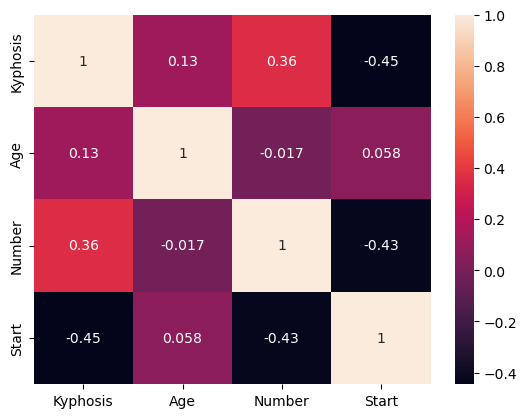

In [71]:
# Correlation 
sns.heatmap(kyphosis_df.corr(), annot = True)

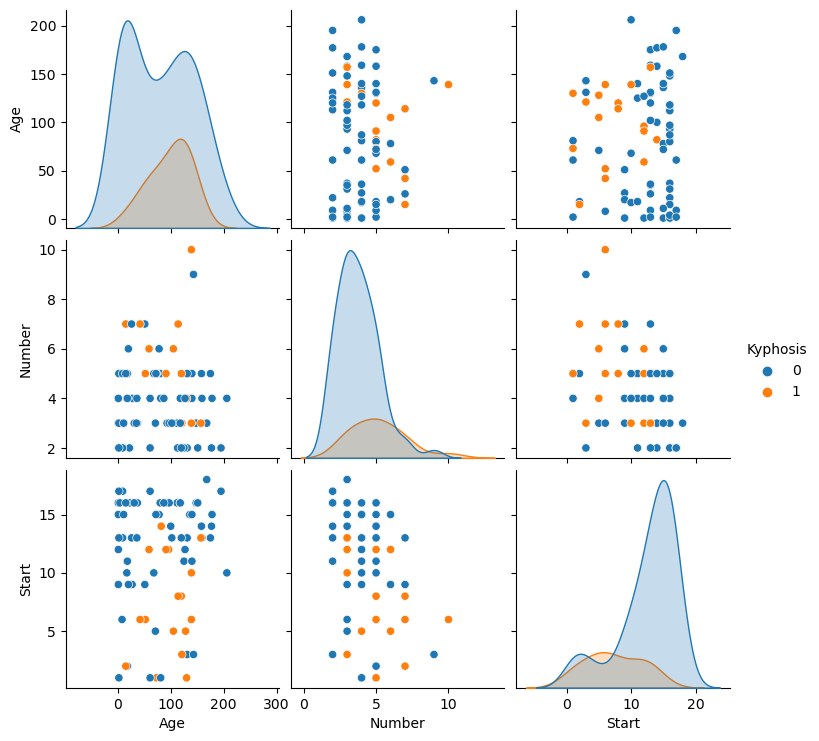

In [72]:
# Visualize 
sns.pairplot(kyphosis_df, hue = 'Kyphosis', vars = ['Age', 'Number', 'Start'])

## Testing and Training dataset

In [73]:
# (Kyphosis) target class/output and 3 inputs (Age Number and Start)
kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [74]:
# Drop the target label (Kyphosis column)
X = kyphosis_df.drop(['Kyphosis'], axis = 1)

In [75]:
# Inputs to the Machine learning algorithm
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [76]:
# Output target class
y = kyphosis_df['Kyphosis']

In [77]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [78]:
# Divide data into training and testing sets
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Training Model

In [80]:
# 56 samples/data point for training
X_train.shape

(56, 3)

In [81]:
y_train.shape

(56,)

In [82]:
# 25 samples for testing
X_test.shape

(25, 3)

In [83]:
y_test.shape

(25,)

In [84]:
# Train a decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

In [85]:
decision_tree = DecisionTreeClassifier()    # Instantiate an object out of our class
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

## Evaluating the model 

In [86]:
from sklearn.metrics import classification_report, confusion_matrix

In [87]:
# Plot the Confusion Matrix for the testing dataset  
y_predict_test = decision_tree.predict(X_test)

In [88]:
y_predict_test

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1])

In [89]:
y_test

31    0
18    0
62    0
78    0
57    1
52    1
5     0
4     0
72    0
61    1
77    0
7     0
35    0
26    0
25    0
19    0
49    0
73    0
11    0
42    0
0     0
9     1
37    1
67    0
2     1
Name: Kyphosis, dtype: int64

In [90]:
cm = confusion_matrix(y_test, y_predict_test)

<AxesSubplot:>

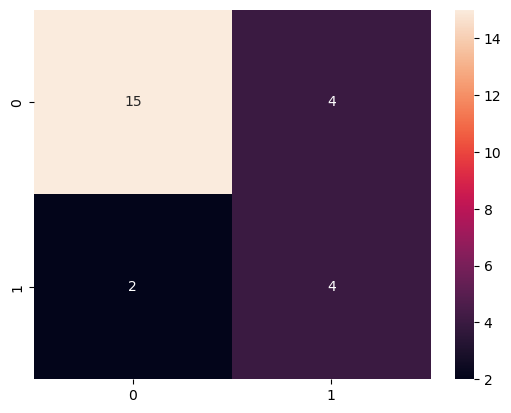

In [91]:
# Misclassified 3 and 4 samples. Correctly classified 18 samples (16 class 0 and 2 class 1)
sns.heatmap(cm, annot = True)

In [92]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        19
           1       0.50      0.67      0.57         6

    accuracy                           0.76        25
   macro avg       0.69      0.73      0.70        25
weighted avg       0.79      0.76      0.77        25



In [93]:
""" RF
precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.67      0.33      0.44         6"""

' RF\nprecision    recall  f1-score   support\n\n           0       0.82      0.95      0.88        19\n           1       0.67      0.33      0.44         6'

## Training model2

In [94]:
# Random Forest classifier to improve the model
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [95]:
#predicting on test data
y_predict_test = RandomForest.predict(X_test)

<AxesSubplot:>

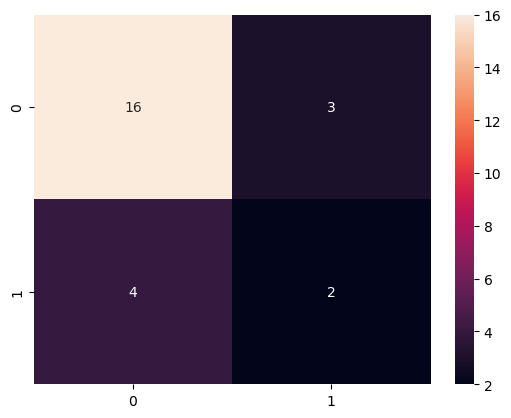

In [96]:
#creating confusion matrix for test prediction
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [97]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        19
           1       0.40      0.33      0.36         6

    accuracy                           0.72        25
   macro avg       0.60      0.59      0.59        25
weighted avg       0.70      0.72      0.71        25

